# **Application of Logistic Regression for Flood Susceptibility Zonation**

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

## **Read the Data**

In [2]:
training_df = pd.read_csv("D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\CSVs\Training_Data.csv")
testing_df = pd.read_csv("D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\CSVs\Testing_Data.csv")

In [3]:
training_df.head()

,Relief_Amplitude,Dist_to_River,TWI,Rainfall,Clay_Content,STI,TRI,TPI,SPI,NDVI,...,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,Lithology_S_Si_Gr,LULC_Agricultural_Field,LULC_Bare_Ground,LULC_Built_UP_Area,LULC_Natural_Vegetation,LULC_Waterbodies,Flood
0,0.142857,0.518128,0.165104,0.587614,0.785714,0.000000,0.280636,0.580849,0.000000e+00,0.700116,...,0,1,0,0,1,0,0,0,0,1
1,0.000000,0.128572,0.571387,0.344053,0.690476,0.000000,0.000000,0.501084,5.680000e-06,0.437787,...,0,1,0,0,1,0,0,0,0,1
2,0.061224,0.164325,0.149176,0.698571,0.761905,0.000000,0.177382,0.533338,0.000000e+00,0.601291,...,0,1,0,0,1,0,0,0,0,1
3,0.102041,0.433816,0.446274,0.324463,0.714286,0.000881,0.263824,0.460808,3.050000e-05,0.616554,...,0,0,0,0,1,0,0,0,0,1
4,0.122449,0.628029,0.320437,0.359155,0.738095,0.000070,0.327950,0.456793,7.680000e-07,0.572900,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# Drop the geometry columns
training_df.drop("geometry", axis=1, inplace=True)
testing_df.drop("geometry", axis=1, inplace=True)

training_df.columns == testing_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [5]:
training_df.shape

(1582, 33)

In [6]:
# Check for the null values
training_df.isnull().sum().sum()

0

In [7]:
testing_df.isnull().sum().sum()

0

## **Specify the Train Test Data**

In [8]:
X_train, y_train = training_df.drop("Flood", axis=1), training_df["Flood"]
X_test, y_test = testing_df.drop("Flood", axis=1), testing_df["Flood"]

X_train.shape, X_test.shape

((1582, 32), (678, 32))

In [9]:
X_train.head()

,Relief_Amplitude,Dist_to_River,TWI,Rainfall,Clay_Content,STI,TRI,TPI,SPI,NDVI,...,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,Lithology_S_Si_Gr,LULC_Agricultural_Field,LULC_Bare_Ground,LULC_Built_UP_Area,LULC_Natural_Vegetation,LULC_Waterbodies
0,0.142857,0.518128,0.165104,0.587614,0.785714,0.000000,0.280636,0.580849,0.000000e+00,0.700116,...,0,0,1,0,0,1,0,0,0,0
1,0.000000,0.128572,0.571387,0.344053,0.690476,0.000000,0.000000,0.501084,5.680000e-06,0.437787,...,0,0,1,0,0,1,0,0,0,0
2,0.061224,0.164325,0.149176,0.698571,0.761905,0.000000,0.177382,0.533338,0.000000e+00,0.601291,...,0,0,1,0,0,1,0,0,0,0
3,0.102041,0.433816,0.446274,0.324463,0.714286,0.000881,0.263824,0.460808,3.050000e-05,0.616554,...,1,0,0,0,0,1,0,0,0,0
4,0.122449,0.628029,0.320437,0.359155,0.738095,0.000070,0.327950,0.456793,7.680000e-07,0.572900,...,1,0,0,0,0,1,0,0,0,0


In [10]:
# Change the datatype into float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

## **Feature Selection using Information Gain**

In [11]:
# Select the important features
selected_features = ['Dist_to_River', 'TWI', 'Rainfall', 'Clay_Content', 'TRI', 'NDVI',
                     'MFI', 'Elevation', 'MNDWI', 'Drainage_Density', 'Geomorphology_Active_Flood_Plain',
                     'Geomorphology_Older_Alluvial_Plain', 'Geomorphology_Older_Flood_Plain',
                     'Lithology_Cl_wi_S_Si_Ir_N', 'Lithology_Fe_Ox_S_Si_Cl',
                     'Lithology_S_Si_Cl', 'Lithology_S_Si_Cl_wi_Cal_Co',
                     'LULC_Agricultural_Field', 'LULC_Built_UP_Area',
                     'LULC_Natural_Vegetation']

In [12]:
X_train = X_train[selected_features]
X_train

,Dist_to_River,TWI,Rainfall,Clay_Content,TRI,NDVI,MFI,Elevation,MNDWI,Drainage_Density,Geomorphology_Active_Flood_Plain,Geomorphology_Older_Alluvial_Plain,Geomorphology_Older_Flood_Plain,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,LULC_Agricultural_Field,LULC_Built_UP_Area,LULC_Natural_Vegetation
0,0.518128,0.165104,0.587614,0.785714,0.280636,0.700116,0.494337,0.346667,0.409042,0.197955,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.128572,0.571387,0.344053,0.690476,0.000000,0.437787,0.326095,0.120000,0.595915,0.695821,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.164325,0.149176,0.698571,0.761905,0.177382,0.601291,0.628901,0.280000,0.382371,0.492745,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.433816,0.446274,0.324463,0.714286,0.263824,0.616554,0.316538,0.386667,0.307860,0.212729,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.628029,0.320437,0.359155,0.738095,0.327950,0.572900,0.335859,0.573333,0.437553,0.028424,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0.247812,0.458075,0.339795,0.738095,0.167428,0.734888,0.337946,0.213333,0.430147,0.341095,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1578,0.373099,0.441171,0.752537,0.785714,0.213931,0.543738,0.755592,0.280000,0.279368,0.243732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1579,0.043243,0.521885,0.472152,0.785714,0.000000,0.680051,0.413672,0.240000,0.483247,0.091759,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1580,0.043243,0.218019,0.160826,0.761905,0.088422,0.757050,0.160709,0.173333,0.509301,0.189769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:
X_test = X_test[selected_features]
X_test

,Dist_to_River,TWI,Rainfall,Clay_Content,TRI,NDVI,MFI,Elevation,MNDWI,Drainage_Density,Geomorphology_Active_Flood_Plain,Geomorphology_Older_Alluvial_Plain,Geomorphology_Older_Flood_Plain,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,LULC_Agricultural_Field,LULC_Built_UP_Area,LULC_Natural_Vegetation
0,0.017297,0.520829,0.088173,0.666667,0.270604,0.713929,0.088429,0.253333,0.440593,0.190851,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.008649,0.570254,0.871880,0.761905,0.138092,0.395510,0.854243,0.253333,0.250467,0.622337,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.079737,0.170232,0.475129,0.761905,0.237181,0.373748,0.427817,0.320000,0.398804,0.711552,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.017297,0.567649,0.370257,0.690476,0.094671,0.735108,0.395295,0.240000,0.452172,0.368527,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.453789,0.506040,0.605048,0.785714,0.000000,0.459768,0.543641,0.213333,0.572473,0.388870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.085180,0.490869,0.805669,0.000000,0.000000,0.416317,0.724173,0.186667,0.322653,0.906714,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
674,0.250812,0.611297,0.665655,0.785714,0.241167,0.415231,0.620405,0.320000,0.391361,0.336242,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
675,0.449732,0.098939,0.858297,0.761905,0.275839,0.720634,0.886617,0.306667,0.452278,0.356751,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
676,0.519858,0.090232,0.453336,0.714286,0.317311,0.560459,0.432133,0.373333,0.326396,0.303396,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Apply Logistic Regression Classification**

### **Build a Logistic Regression Model**

In [14]:
from sklearn.linear_model import LogisticRegression

In [16]:
# Instantiate a LogisticRegression object
log_reg = LogisticRegression()

### **Hyperparameter Tuning**

In [18]:
# Define all the hyperparameters for Logistic Regression Model
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None]
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
# Apply Randomized Search CV
log_reg_grid = RandomizedSearchCV(estimator=log_reg,
                                  param_distributions=log_reg_param_grid,
                                  n_iter=1000,
                                  scoring="accuracy",
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=1)

In [21]:
# Fit the training data to Randomized Search CV
log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=1000, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs', 'sag', 'saga']},
                   scoring='accuracy', verbose=1)

In [22]:
log_reg_grid.best_params_

{'solver': 'saga',
 'penalty': 'l1',
 'max_iter': 200,
 'class_weight': 'balanced',
 'C': 100}

In [23]:
# Check the best score
log_reg_grid.best_score_

0.8306013656510801

In [24]:
# Build a Logistic Regression Model with best estimators
log_reg_final = log_reg_grid.best_estimator_
log_reg_final

LogisticRegression(C=100, class_weight='balanced', max_iter=200, penalty='l1',
                   solver='saga')

## **Accuracy Assessment**

In [25]:
# Predict the test data
y_pred = log_reg_final.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8303834808259587


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       323
           1       0.84      0.84      0.84       355

    accuracy                           0.83       678
   macro avg       0.83      0.83      0.83       678
weighted avg       0.83      0.83      0.83       678



## **Feature Importance**

In [33]:
# Get the feature importance
feature_importance = log_reg_final.coef_[0]

# Convert the feature importance into a pandas series
feature_importance = pd.Series(feature_importance, index=X_train.columns)

# Sort the values in descending order
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

Rainfall                              11.036016
NDVI                                   3.049929
Drainage_Density                       0.764336
LULC_Agricultural_Field                0.746555
Geomorphology_Active_Flood_Plain       0.425938
MNDWI                                  0.079709
Lithology_S_Si_Cl                     -0.615404
Lithology_S_Si_Cl_wi_Cal_Co           -0.659016
TRI                                   -0.760814
TWI                                   -0.900441
Dist_to_River                         -1.319163
Geomorphology_Older_Flood_Plain       -1.757936
LULC_Built_UP_Area                    -1.767628
Clay_Content                          -1.935587
Lithology_Fe_Ox_S_Si_Cl               -2.124041
Geomorphology_Older_Alluvial_Plain    -2.130493
Lithology_Cl_wi_S_Si_Ir_N             -2.250237
LULC_Natural_Vegetation               -2.469934
Elevation                             -4.646069
MFI                                  -13.950594
dtype: float64

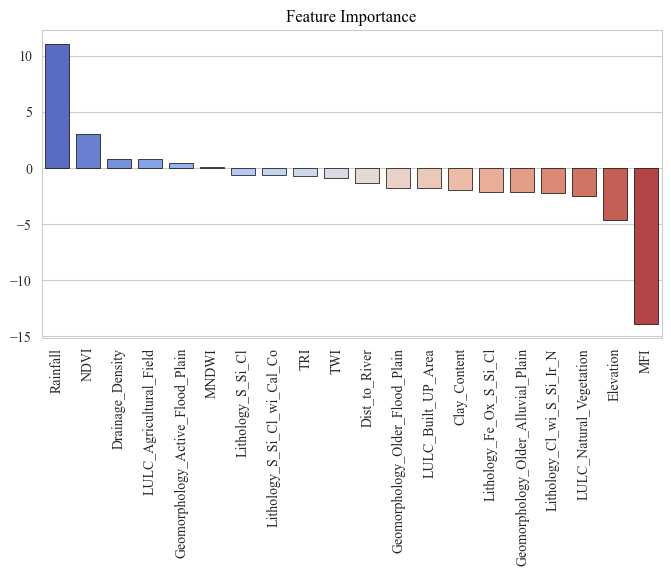

In [43]:
# Plot the feature importance
plt.figure(figsize=(8, 4), dpi=100)

# Define a color palette
color_palette = sns.color_palette(palette="coolwarm", n_colors=len(feature_importance))

sns.barplot(x=feature_importance.index, y=feature_importance, palette=color_palette, 
            edgecolor="black", linewidth=0.5)
plt.title("Feature Importance", fontname="Times New Roman", color="black", fontsize=12)
plt.xticks(fontname="Times New Roman", rotation=90)
plt.yticks(fontname="Times New Roman")
plt.show()

## **Export the Model**

In [35]:
import pickle

In [36]:
output_folder = "D:\\Coding\\Git Repository\\Research Repo\\Flood\\Flood-Susceptibility-Zonation-of-Maldah\\Model\\"
model_name = "log_reg_model.pkl"

In [38]:
# Export the model
# pickle.dump(log_reg_final, file=open(output_folder+model_name, "wb"))